## HMM tarining in both a supervised and unsupervised manner

> The provided dataset does not contain a set of sequences, it only contains a list of consecutive days. Thus, a sliding windows is defined with a size of 10 to make sequences of size 10, and continue the calculations. 

In [70]:
%load_ext autoreload
%autoreload 2

import numpy as np
from HMM import hmm
import os

source_dir = "Dataset/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
# Read and reform the dataset
file_read = open(source_dir+[item for item in os.listdir(source_dir) if ".txt" in item][0], "r+")
lines = file_read.readlines()[1:]
fix_data = lambda line: line.strip().replace('\n', "").split(",")
dataset = np.array(list(map(fix_data, lines)), dtype=object)

In [85]:
supervised_model = hmm()
supervised_model.supervised_training(dataset[:, 1], dataset[:, 0])

In [107]:
print(supervised_model)

,foggy,rainy,sunny
foggy,0.430666,0.276498,0.193129
rainy,0.187628,0.545678,0.165916
sunny,0.130264,0.040732,0.729240


,no,yes
foggy,0.749057,0.250943
rainy,0.220401,0.779599
sunny,0.897678,0.102322


100%|██████████| 30/30 [00:21<00:00,  1.40it/s]


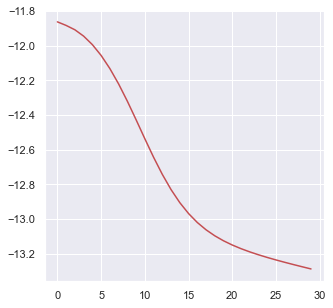

In [123]:
unsupervised_model = hmm()
unsupervised_model.unsupervised_training(dataset[:, 1], states, iterations=30)

In [124]:
print(unsupervised_model)

,foggy,rainy,sunny
foggy,0.047586,0.478302,0.474112
rainy,0.181346,0.665377,0.153277
sunny,0.072661,0.150646,0.776693


,no,yes
foggy,0.689131,0.310869
rainy,0.379988,0.620012
sunny,0.949439,0.050561


#### Let's test some sequences

In [125]:
seqences = [["yes"], 
            ["no"], 
            ['yes', 'yes'], 
            ['no', "yes"], 
            ["yes", "no"], 
            ["yes", "yes", "no"], 
            ["yes", "yes", "no", "yes"], 
            ["no", "no", "yes", "no"], 
            ["no", "no", "no", "yes", "no", "no", "yes", "yes", "no", "yes"]]

for seq in seqences:
    print(seq)
    print(f"The decoded sequence: {supervised_model.viterbi(seq)}")
    print(f"Likelihood{supervised_model.likelihood(seq)[0]:.3}\n")

['yes']
The decoded sequence: ['rainy']
Likelihood0.378

['no']
The decoded sequence: ['sunny']
Likelihood0.622

['yes', 'yes']
The decoded sequence: ['rainy', 'rainy']
Likelihood0.161

['no', 'yes']
The decoded sequence: ['foggy', 'rainy']
Likelihood0.163

['yes', 'no']
The decoded sequence: ['rainy', 'sunny']
Likelihood0.179

['yes', 'yes', 'no']
The decoded sequence: ['rainy', 'rainy', 'sunny']
Likelihood0.0722

['yes', 'yes', 'no', 'yes']
The decoded sequence: ['rainy', 'rainy', 'rainy', 'rainy']
Likelihood0.0214

['no', 'no', 'yes', 'no']
The decoded sequence: ['sunny', 'sunny', 'sunny', 'sunny']
Likelihood0.0474

['no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes']
The decoded sequence: ['sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'foggy', 'rainy', 'rainy', 'rainy', 'rainy']
Likelihood0.000206



In [126]:
for seq in seqences:
    print(seq)
    print(f"The decoded sequence: {unsupervised_model.viterbi(seq)}")
    print(f"Likelihood{unsupervised_model.likelihood(seq)[0]:.3}\n")

['yes']
The decoded sequence: ['rainy']
Likelihood0.327

['no']
The decoded sequence: ['sunny']
Likelihood0.673

['yes', 'yes']
The decoded sequence: ['rainy', 'rainy']
Likelihood0.136

['no', 'yes']
The decoded sequence: ['foggy', 'rainy']
Likelihood0.187

['yes', 'no']
The decoded sequence: ['rainy', 'rainy']
Likelihood0.191

['yes', 'yes', 'no']
The decoded sequence: ['rainy', 'rainy', 'rainy']
Likelihood0.0746

['yes', 'yes', 'no', 'yes']
The decoded sequence: ['rainy', 'rainy', 'rainy', 'rainy']
Likelihood0.0248

['no', 'no', 'yes', 'no']
The decoded sequence: ['sunny', 'sunny', 'sunny', 'sunny']
Likelihood0.0656

['no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes']
The decoded sequence: ['sunny', 'sunny', 'sunny', 'rainy', 'rainy', 'rainy', 'rainy', 'rainy', 'rainy', 'rainy']
Likelihood0.000612

